# Double Pendulum Exploration

## Introduction: Single Pendulum
Consider the typical pendulum from your introductory Physics course:

<p align="center"><img src= "simpen.png" <p>


Finding the equations of motion is straight forward, using Lagrangian Mechanics:

$$
\begin{equation}
\begin{split}
     \mathcal{L} &= T - V\\
     \mathcal{L} &= \frac{1}{2}I\omega^{2} + mgLcos\left(\theta\right)\\
     \mathcal{L} &= \frac{1}{2}(L^2m)\dot{\theta}^2 + mgLcos\left(\theta\right)\\
     \frac{\partial\mathcal{L}}{\partial\theta} &= -mgLsin\left(\theta\right)\\
     \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot{\theta}} &= \frac{d}{dt}\left(L^2m\dot{\theta}\right)=mL^2\ddot{\theta}\\
     \therefore \ddot{\theta} &= -\frac{g}{L}\sin\left(\theta\right)\\
\end{split}
\end{equation}
$$

Therefore, for a simple pendulum, without a driving force or a damping coefficient, the equation of motion is simply,
$$
\begin{equation}
\ddot{\theta} = -\frac{g}{L}\sin\left(\theta\right).
\tag{1}
\end{equation}
$$

If there is a driving force and damping, the following equation describes the system,
$$
\begin{equation}
\ddot{\theta} = -\frac{g}{L}\sin\left(\theta\right) - \alpha\dot{\theta} + f\cos\left(\omega t\right).
\tag{2}
\end{equation}
$$
Both equations shown above cannot be solved unless numerical methods, or in this case, computational methods are utilized.

If we apply a small angle approximation on both Equation (1) and Equation (2), we arrive at the following equations:
$$
\begin{equation}
\ddot{\theta} \approx -\frac{g}{L}\theta
\tag{3}
\end{equation}
$$
$$
\begin{equation}
\ddot{\theta} \approx -\frac{g}{L}\theta - \alpha\dot{\theta} +f\cos\left(\omega t\right)
\tag{4}
\end{equation}
$$

Both equations showed can be solved analytically, with the latter requiring a little more work. For our puposes Equation (3) will be solved analytically and compared to the solution obtained from the algorithm used.


Obtaining the characteristic equation for Equation (3), and applying the boundary conditions yields,

$$
\begin{equation}
\theta\left(t\right) = \theta_{0}\cos\left(\sqrt{\frac{g}{L}}t \right).
\tag{5}
\end{equation}
$$

Equation (5) will be used to verify if the algorithm used to solve Equation (3) works.

## Single Pendulum Class

To maintain the code block in just one cell, a class called *SinglePendulum* was written. The contents of the class are the following:
+ \_\_init\_\_(l, g, a, f, small)
    + This function takes the length of the string, the gravitational constant, the damping coefficient, the driving force, and a boolean variable, as parameters. The boolean parameter is set to True if there is a small angle approximation, or False if there isn't a small angle approximation.
    + It initializes the variables that we will be using within the class
    + Basically the constructor
+ canned(x, t)
    + This function was used when debugging to check that the output matched with the Python ODE solver.
    + The parameters are the initial conditions of the system, as well as the time range. Both of the parameters should be array types.
+ rk4(x, t, dt)
    + This function is used to apply the Runge-Kutta-4 algorithm to the differential equations.
    + The parameters are the initial conditions, the time array, and the time step.
    
+ g1(x, y0, y1, t)
    + This function takes in four array parameters; the initial conditions, the values of the solution, the values of the derivative of the solution, and time.
    + Plots the different graphs $\theta$ v. t, $\dot{\theta}$ v. t, and $\dot{\theta}$ v. $\theta$ for the small angle approximation, and compares to Equation (5).
+ g2(y0, y1, t)
    + This function takes in four array parameters; the initial conditions, the values of the solution, the values of the derivative of the solution, and time.
    + Plots the different graphs $\theta$ v. t, $\dot{\theta}$ v. t, and $\dot{\theta}$ v. $\theta$ for any angle.
+ g3(y0, y1, y01, y11, t)
    + This function is used to compare the plots produced when small angle approximations are taken, with those produced when there is no approximation.
    
The code cell containing all of these is below.


__Note__: Although there are multiple ways of solving the differential equation with computational methods, the Runge-Kutta *__[5]__*, is the method that will be used,

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate


class singlePendulum(object):
    """
    (1). __init__: Initializes the coefficients used in the equations
    (2). canned: Called when the canned ODE solver is used to check the methods used
        Let x = [x[0], x[1]];
        Where x[0] is the initial angle and x[1] is the angular frequency.
        The system of ODE's we will be defining is:
        y[0] = x[1]
        y[1] = -g/l*np.sin(x[0]) - a*y[0] + f*np.cos(w*t)
    (3). rk4: Will be the Runge-Kutta-4 method for solving ODE's
    """
    def __init__(self, l, g, a, f, small):
        self.l = l # Length of the string
        self.g = g # Gravitational Acceleration
        self.a = a # Damping constant
        self.f = f # Driving force
        self.small = small # Boolean variable: True for angle approx., False otherwise.
    
    # Function to call when the Standard Python ODE solver is called
    def canned(self,x,t):
        x = x # Array for the initial conditions    
        # Defining the variables, var, as self.var so I don't have to write self all the time
        l = self.l
        g = self.g
        a = self.a
        f = self.f
        small = self.small
        # Creates an array of zeros the size of x; 2
        y = np.zeros(len(x))
        w = 0.5
        if small == False:
            # System of ODE's for any angle
            y[0] = x[1]
            y[1] = (-g/l)*np.sin(x[0]) - a*y[0] + f*np.cos(w*t)
            return y
        else:
            # System of ODE's for small angle approx.
            y[0] = x[1]
            y[1] = (-g/l)*x[0] - a*y[0] + f*(1-(x[0]*x[0])/2.0)
            return y
    # Rung-Kutta-4 method
    def rk4(self, x, t, dt):
        N = len(t)
        # Defining the variables, var, as self.var so I don't have to write self all the time
        l = self.l
        g = self.g
        a = self.a
        f = self.f
        small = self.small
        # Creates arrays the size of N; the size of the time range
        x0 = np.zeros(N)
        x1 = np.zeros(N)
        # Sets the intial conditions for the arrays defined above
        x0[0] = x[0]
        x1[0] = x[1]
        h = dt
        w = 0.5
        if small == False:
            # Runge-Kutta calculations for the
            # x0[i] is found using the euler method
            for i in range(1,N):
                k1 = dt*(-g/l*np.sin(x0[i-1]) - a*x1[i-1] + f*np.cos(w*t[i-1]))
                k2 = dt*(-g/l*np.sin(x0[i-1] + h/2.) - a*(x1[i-1]+k1/2.) + f*np.cos(w*t[i-1]))
                k3 = dt*(-g/l*np.sin(x0[i-1] + h/2.) - a*(x1[i-1]+k2/2.) + f*np.cos(w*t[i-1]))
                k4 = dt*(-g/l*np.sin(x0[i-1] + h/2.) - a*(x1[i-1]+k3/2.) + f*np.cos(w*t[i-1]))
                x1[i] = x1[i-1] + (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
                x0[i] = x0[i-1] + h*x1[i]
            return x0,x1
        else:
            # Runge-Kutta calculations for the
            # x0[i] is found using the euler method
            for i in range(1,N):
                k1 = dt*(-g/l*x0[i-1] - a*x1[i-1] + f*np.cos(w*t[i-1]))
                k2 = dt*(-g/l*(x0[i-1] + h/2.) - a*(x1[i-1]+k1/2.) + f*np.cos(w*t[i-1]))
                k3 = dt*(-g/l*(x0[i-1] + h/2.) - a*(x1[i-1]+k2/2.) + f*np.cos(w*t[i-1]))
                k4 = dt*(-g/l*(x0[i-1] + h/2.) - a*(x1[i-1]+k3/2.) + f*np.cos(w*t[i-1]))
                x1[i] = x1[i-1] + (1./6.)*(k1 + 2.*k2 + 2.*k3 + k4)
                x0[i] = x0[i-1] + h*x1[i]
            return x0,x1
    # Method to plot for small angle approximation, with comparisson
    def g1(self, x, y0,y1, t):
        N0 = len(y0)
        N1 = len(y1)
        if self.small == True:
            des = "- $\\theta$ Approximation"
        else:
            des = "- No Approximation"
        fig,z = plt.subplots(3, figsize = (15,15))
        z[0].plot(t,y0, label = "RK4 {}".format(des))
        z[0].plot(t, x[0]*np.cos((self.g/self.l)**0.5*t), label = "Cosine")
        z[0].set_title("$\\theta$ versus t", size = 15)
        z[0].set_xlabel("t [s]", size = 15)
        z[0].set_ylabel("$\\theta$", size = 15)
        z[0].legend(loc = "best")
        z[0].grid()
        z[1].plot(t,y1, label ="RK4 {}".format(des))
        z[1].set_title("$\dot{\\theta}$ versus t", size = 15)
        z[1].set_xlabel("t [s]", size = 15)
        z[1].set_ylabel("$\dot{\\theta}$", size = 15)
        z[1].legend(loc = "best")
        z[1].grid()
        z[2].plot(y0,y1, label = "RK4 {}".format(des))
        z[2].set_title("$\dot{\\theta}$ versus $\\theta$", size =15)
        z[2].set_xlabel("$\\theta$", size = 15)
        z[2].set_ylabel("$\dot{\\theta}$", size = 15)
        z[2].plot(y0[0], y1[0], 'o', label = "Start = ({}, {})".format(y0[0], y1[0]))
        z[2].plot(y0[N0-1], y1[N1-1], 'o', label = "Finish = ({}, {})".format("%.2f"%y0[N0-1], "%.2f"%y1[N1-1]))
        z[2].legend(loc = "best")
        z[2].grid()
        fig.tight_layout()
        plt.show()
        
    # Method to plot for pendulum, without comparison
    def g2(self,y0,y1, t):
        if self.small == True:
            des = "- $\\theta$ Approximation"
        else:
            des = "- No Approximation"
        N0 = len(y0)
        N1 = len(y1)
        fig,z = plt.subplots(3, figsize = (15,15))
        z[0].plot(t,y0, label = "RK4 {}".format(des))
        z[0].set_title("$\\theta$ versus t", size = 15)
        z[0].set_xlabel("t [s]", size = 15)
        z[0].set_ylabel("$\\theta$", size = 15)
        z[0].legend(loc = "best")
        z[0].grid()
        z[1].plot(t,y1, label ="RK4 {}".format(des))
        z[1].set_title("$\dot{\\theta}$ versus t", size = 15)
        z[1].set_xlabel("t [s]", size = 15)
        z[1].set_ylabel("$\dot{\\theta}$", size = 15)
        z[1].legend(loc = "best")
        z[1].grid()
        z[2].plot(y0,y1, label = "RK4 {}".format(des))
        z[2].plot(y0[0], y1[0], 'o', label = "Start = ({}, {})".format(y0[0], y1[0]))
        z[2].plot(y0[N0-1], y1[N1-1], 'o', label = "Finish = ({}, {})".format("%.2f"%y0[N0-1], "%.2f"%y1[N1-1]))
        z[2].set_title("$\dot{\\theta}$ versus $\\theta$", size =15)
        z[2].set_xlabel("$\\theta$", size = 15)
        z[2].set_ylabel("$\dot{\\theta}$", size = 15)
        z[2].legend(loc = "best")
        z[2].grid()
        fig.tight_layout()
        plt.show()

# Method to plot for pendulum, without comparison
    def g3(self,y0,y1, t):
        if self.small == True:
            des = "- $\\theta$ Approximation"
        else:
            des = "- No Approximation"
        fig,z = plt.subplots(3, figsize = (15,15))
        z[0].plot(t,y0, label = "RK4 - {}".format(des))
        z[0].set_title("$\\theta$ versus t", size = 15)
        z[0].set_xlabel("t [s]", size = 15)
        z[0].set_ylabel("$\\theta$", size = 15)
        z[0].legend(loc = "best")
        z[0].grid()
        z[1].plot(t,y1, label = "RK4 - {}".format(des))
        z[1].set_title("$\dot{\\theta}$ versus t", size = 15)
        z[1].set_xlabel("t [s]", size = 15)
        z[1].set_ylabel("$\dot{\\theta}$", size = 15)
        z[1].legend(loc = "best")
        z[1].grid()
        z[2].plot(y0,y1, label = "RK4 - {}".format(des))
        z[2].set_title("$\dot{\\theta}$ versus $\\theta$", size =15)
        z[2].set_xlabel("$\\theta$", size = 15)
        z[2].set_ylabel("$\dot{\\theta}$", size = 15)
        z[2].legend(loc = "best")
        z[2].grid()
        fig.tight_layout()
        plt.show()

## Applying the Single Pendulum Class

For this particular system, there will be four cases of interest.
1. First case:
   + No driving force: $f$ = 0
   + No damping coefficient: $\alpha$ = 0
   + Small angle approximation: $\sin\left(\theta\right) \approx \theta$
2. Second case:
   + No driving force: $f$ = 0
   + No damping coeffieicnt: $\alpha$ = 0
3. Third case:
   + Driving force: $f$ = 0.56
   + Damping coeffieicnt: $\alpha$ = 0.8
   + Small angle approximation: $\sin\left(\theta\right) \approx \theta$
4. Fourth case:
   + Driving force: $f$ = 0.56
   + Damping coefficient: $\alpha$ = 0.8
   
__Note__: Assume that for all of these cases, $l = 1$, $g = 9.81$, and $\omega = 0.5$

### Case One

Based on the information above we can begin by defining our parameters, and constructing a pendulum object.

In [2]:
l = 1.0
g = 9.81
a0 = 0.0
f0 = 0.0
small0 = True
p0 = singlePendulum(l, g, a0, f0, small0)

Let the initial conditions be:

$$
\begin{equation}
\begin{split}
\theta_{0}&= 0.1\\
\dot{\theta}_{0} &= 0\\
\end{split}
\tag{6}
\end{equation}
$$

while the time array cover a region between 0 and $2\pi$, with a step size, dt. In other words,

$$
\begin{equation}
\begin{split}
t_n &\in \left[0, 2\pi\right]\\
t_{n} &= t_{n-1} + ndt \,\,\, \forall n\,\in [1, N]\\
\end{split}
\tag{7}
\end{equation}
$$

Let the final value of the time range, $t_N$, and the step size for the time range be:

$$ t_N = 2\pi$$
$$ dt = 0.001 $$

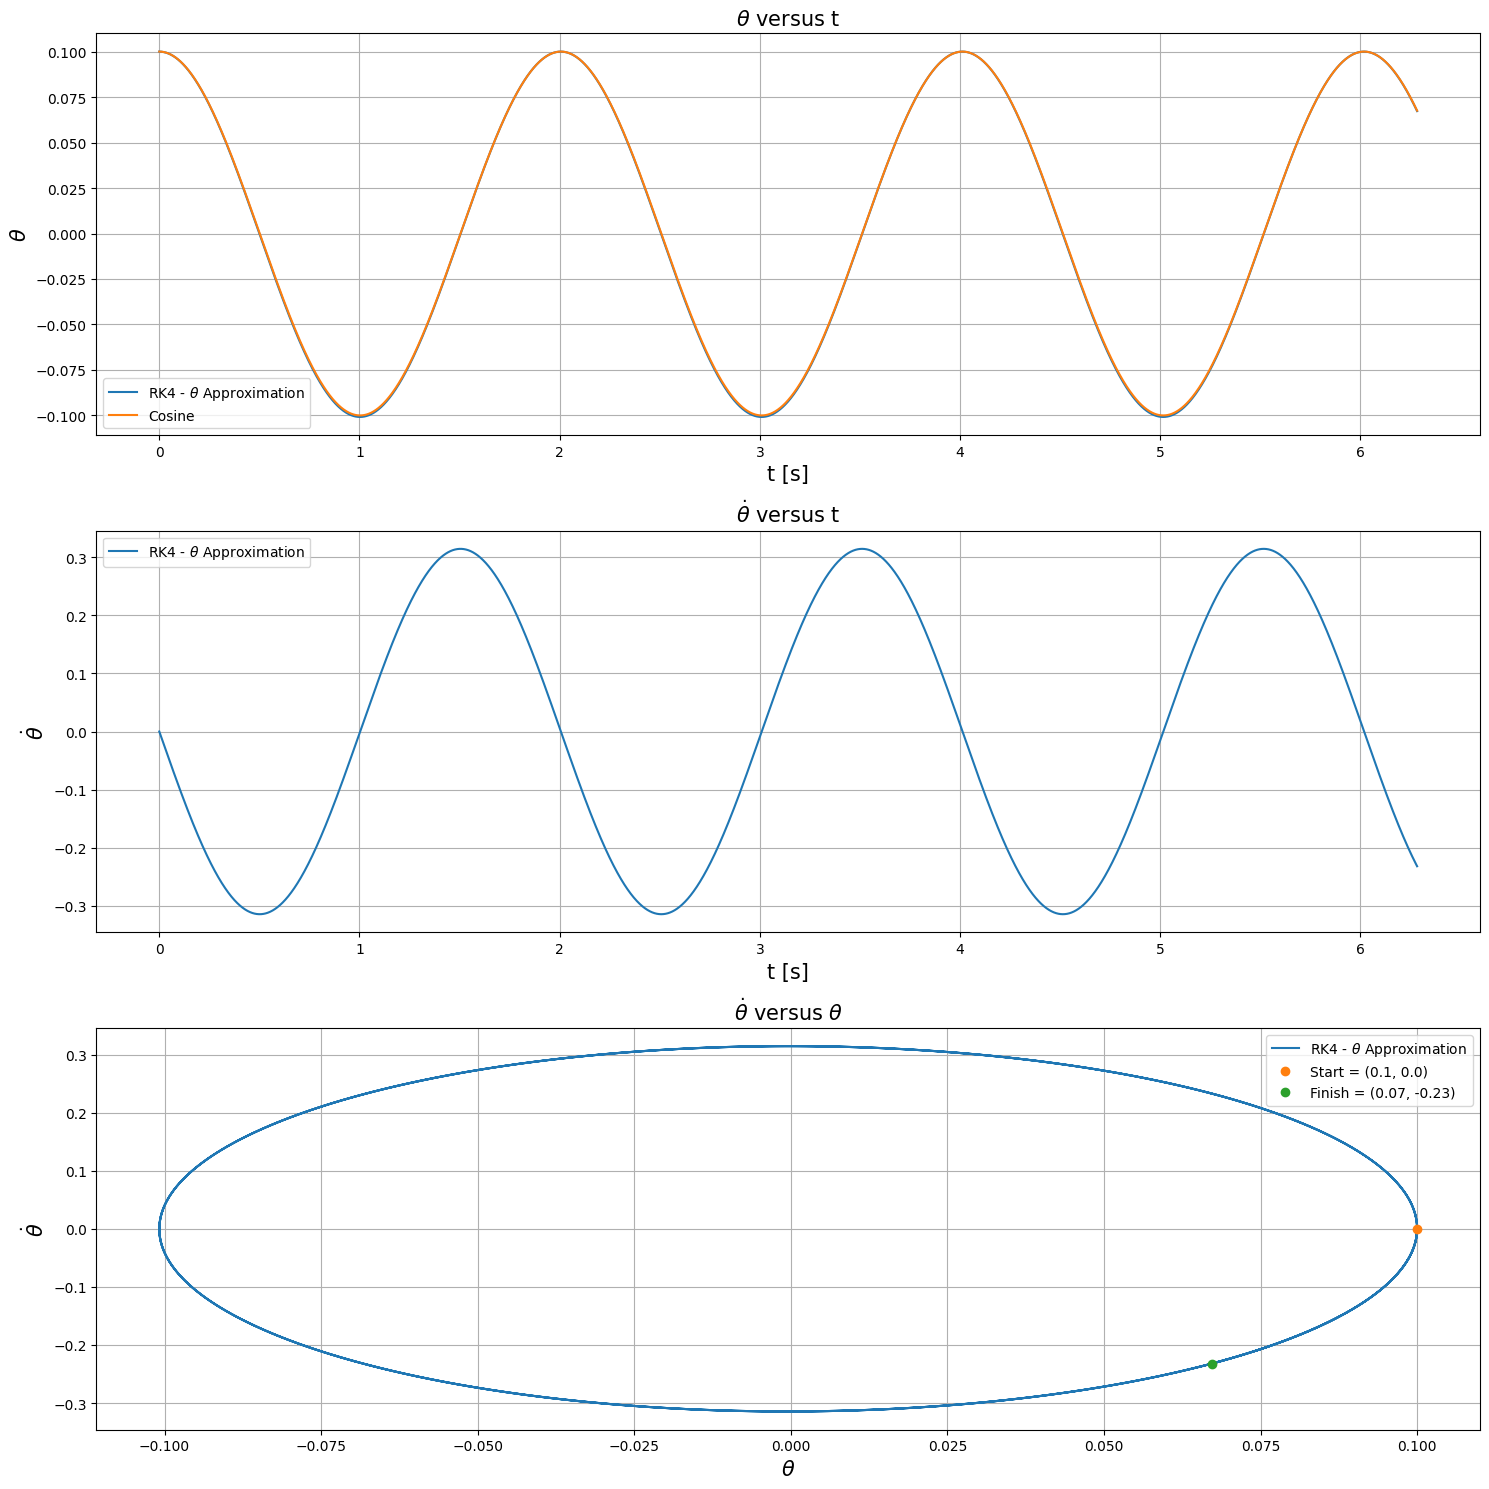

In [3]:
# Defining the initial conditions x0:
x0 = [0.1, 0.0]

# Defining the time range:
## Period
## Time step
## Time array
tn = 2.0*np.pi
dt = 0.001
t = np.arange(0.0, tn, dt)

# Using the defined rk4 method:
y0,y1 = p0.rk4(x0, t, dt)
# Using the g1 method
p0.g1(x0, y0, y1, t)

+ __Plot One__: Based on the plot, "*$\theta$ vs t*", it's apperant that the algorithm yields the behavior corresponding to the solution of the differential equation when the small angle approximation is taken,

$$\theta(t)=\theta_{0}\cos\left(\sqrt{\frac{g}{L}}t\right).$$
The amplitude of the function, will simply be the initial angle chosen, in this case 0.1-$rad$, agreeing with our model. The approximation begins to deviate slowly from the actual value, but for our purposes this is sufficient to explore the behavior of this system.
+ __Plot Two__: If we take the derivative of the equation displayed above we obtain,

$$\dot{\theta}(t) = -\theta_{0}\sqrt{\frac{g}{L}}\sin\left(\sqrt{\frac{g}{L}}t\right)$$.
Where the amplitude of the function is approximately $-0.3$-$s^{-1}$, coinciding with the desciption shown in plot two.
+ __Plot Three__: The phase plot follows a closed orbit, showing the transfer of energy between kinetic and potential for a closed system with constant energy *__[6]__* . We can also derive the equation of the path by dividing the equations shown above by their respective amplitudes, squaring both, and summing them.*__[6]__*.

### Case Two

Recall that the second case is simply *Case One* without the small angle approximation. Since we are not using a small angle approximation, let the initial conditions be the following:

$$
\begin{equation}
\begin{split}
\theta_{0}&= 20\\
\dot{\theta}_{0} &= 0\\
\end{split}
\end{equation}
$$
In this case there is no small angle approximation, so the parameter *small* will be set to *False*.

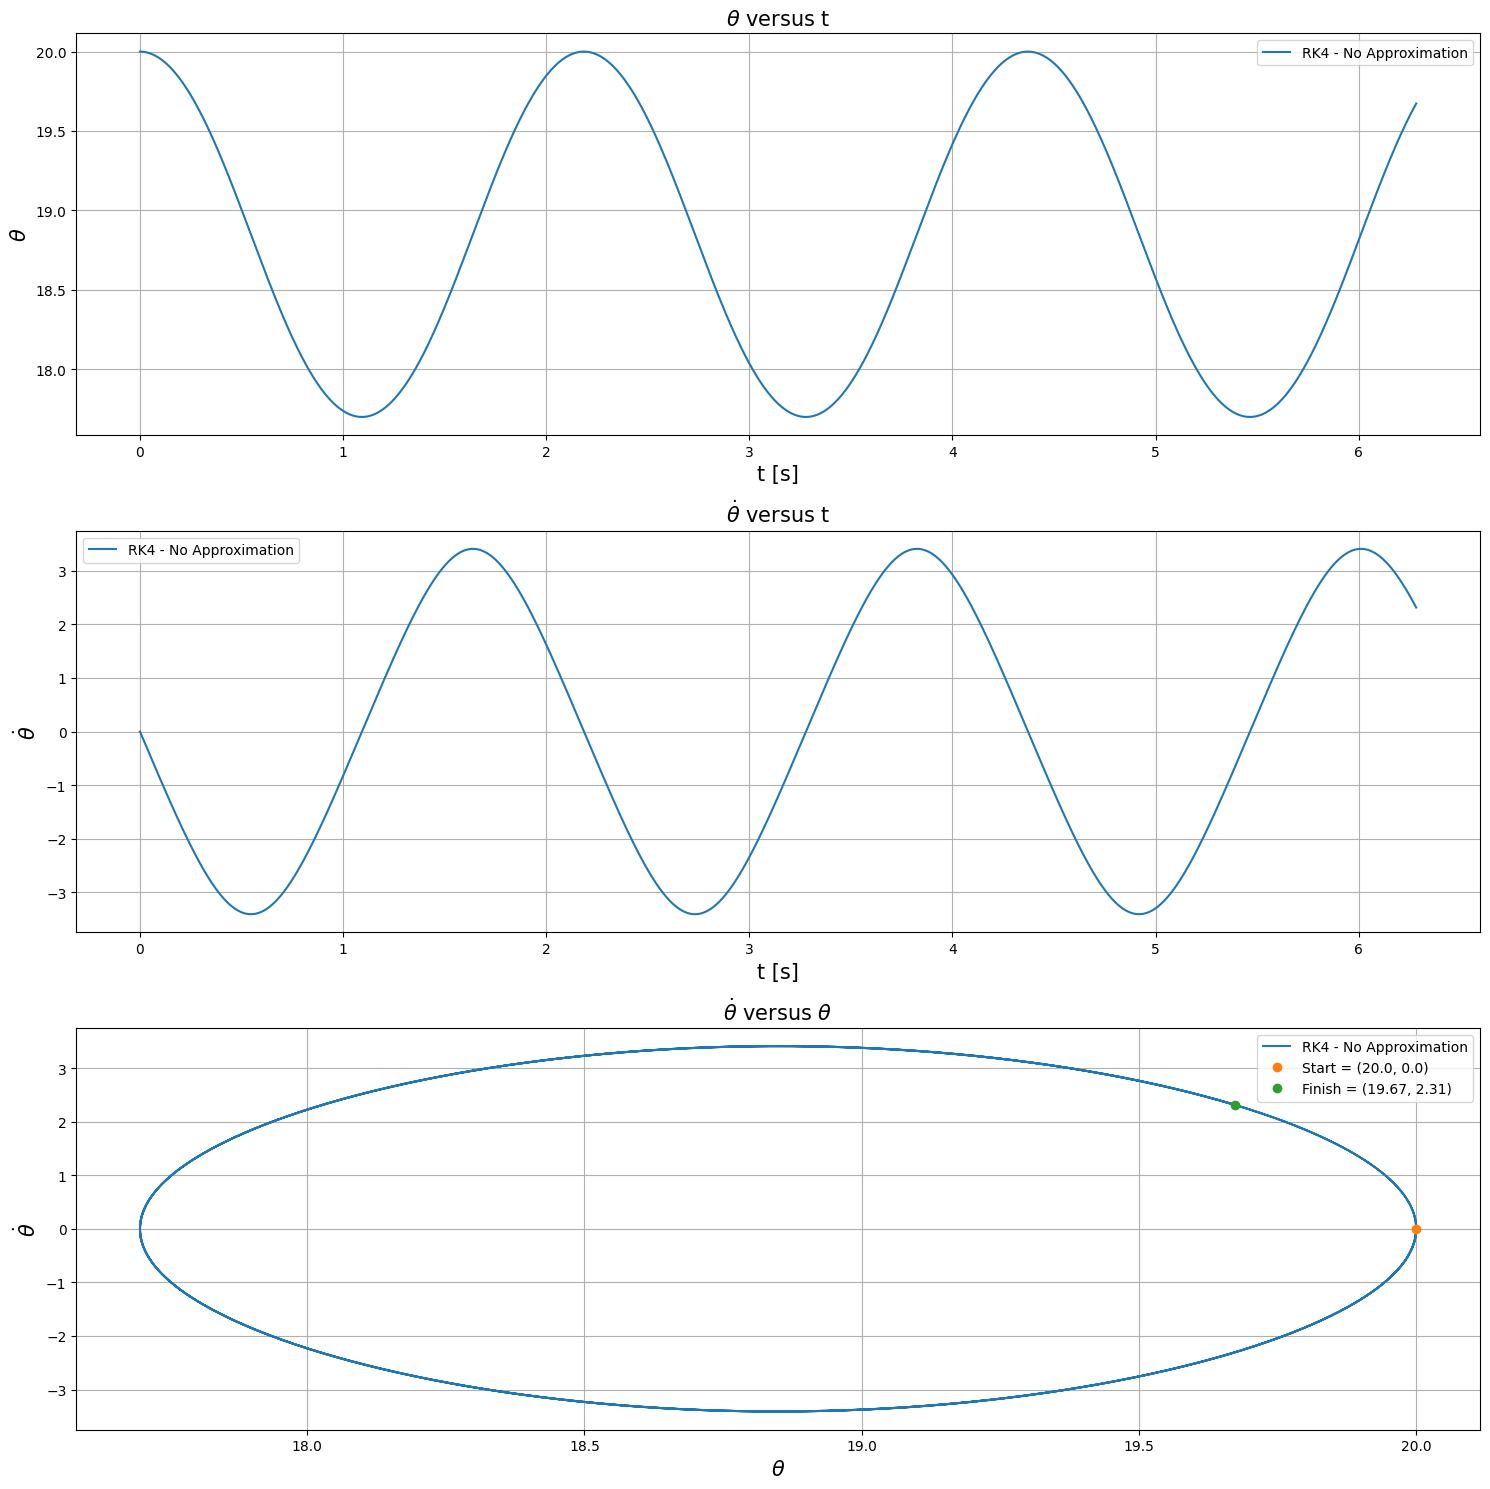

In [4]:
small = False
x01 = [20, 0.0]
# Constructing the pendulum object
p1 = singlePendulum(l, g, a0, f0, small)
# Using the defined rk4 method:
yp0,yp1 = p1.rk4(x01, t, dt)
p1.g2(yp0, yp1, t)

Comparing *__Case One__* and *__Case Two__*, it's apparent that the solution for *__Case Two__* closely resembles that of *__Case One__*, meaning the small angle approximation yields a good approximation for the simple pendulum and the algorithm is able to reproduce the behavior of the pendulum. From phase plots of *__Case One__* and *__Case Two__*, it's clear that the energy is conserved, as it is transferred between kinetic and potential energy. In the following cases there will be __(1)__ a damping coefficient, causing the system to lose energy and __(2)__ a driving force that sets the pendulum in motion.

Based on *__Case One__* and *__Case Two__*, the algorithm works so *__Case Three__* and *__Case Four__* will be analyzed in a similar manner.

### Case Three

Now lets make our program solve the equations of motion for a damped and driven pendulum using the linear approximation. Recall the equation of motion for said system,

$$ \ddot{\theta} \approx -\frac{g}{L}\theta - \alpha\dot{\theta} + f\cos\left(\omega t\right)$$

For this particular case, the damping coefficient will take a value of $\alpha = 0.8$, and the driving force will be $f = 0.56$. With these conditions, lets define our pendula for the respective cases.

__Note:__ The driving frequency, $\omega$, has be set to a default value of 0.5

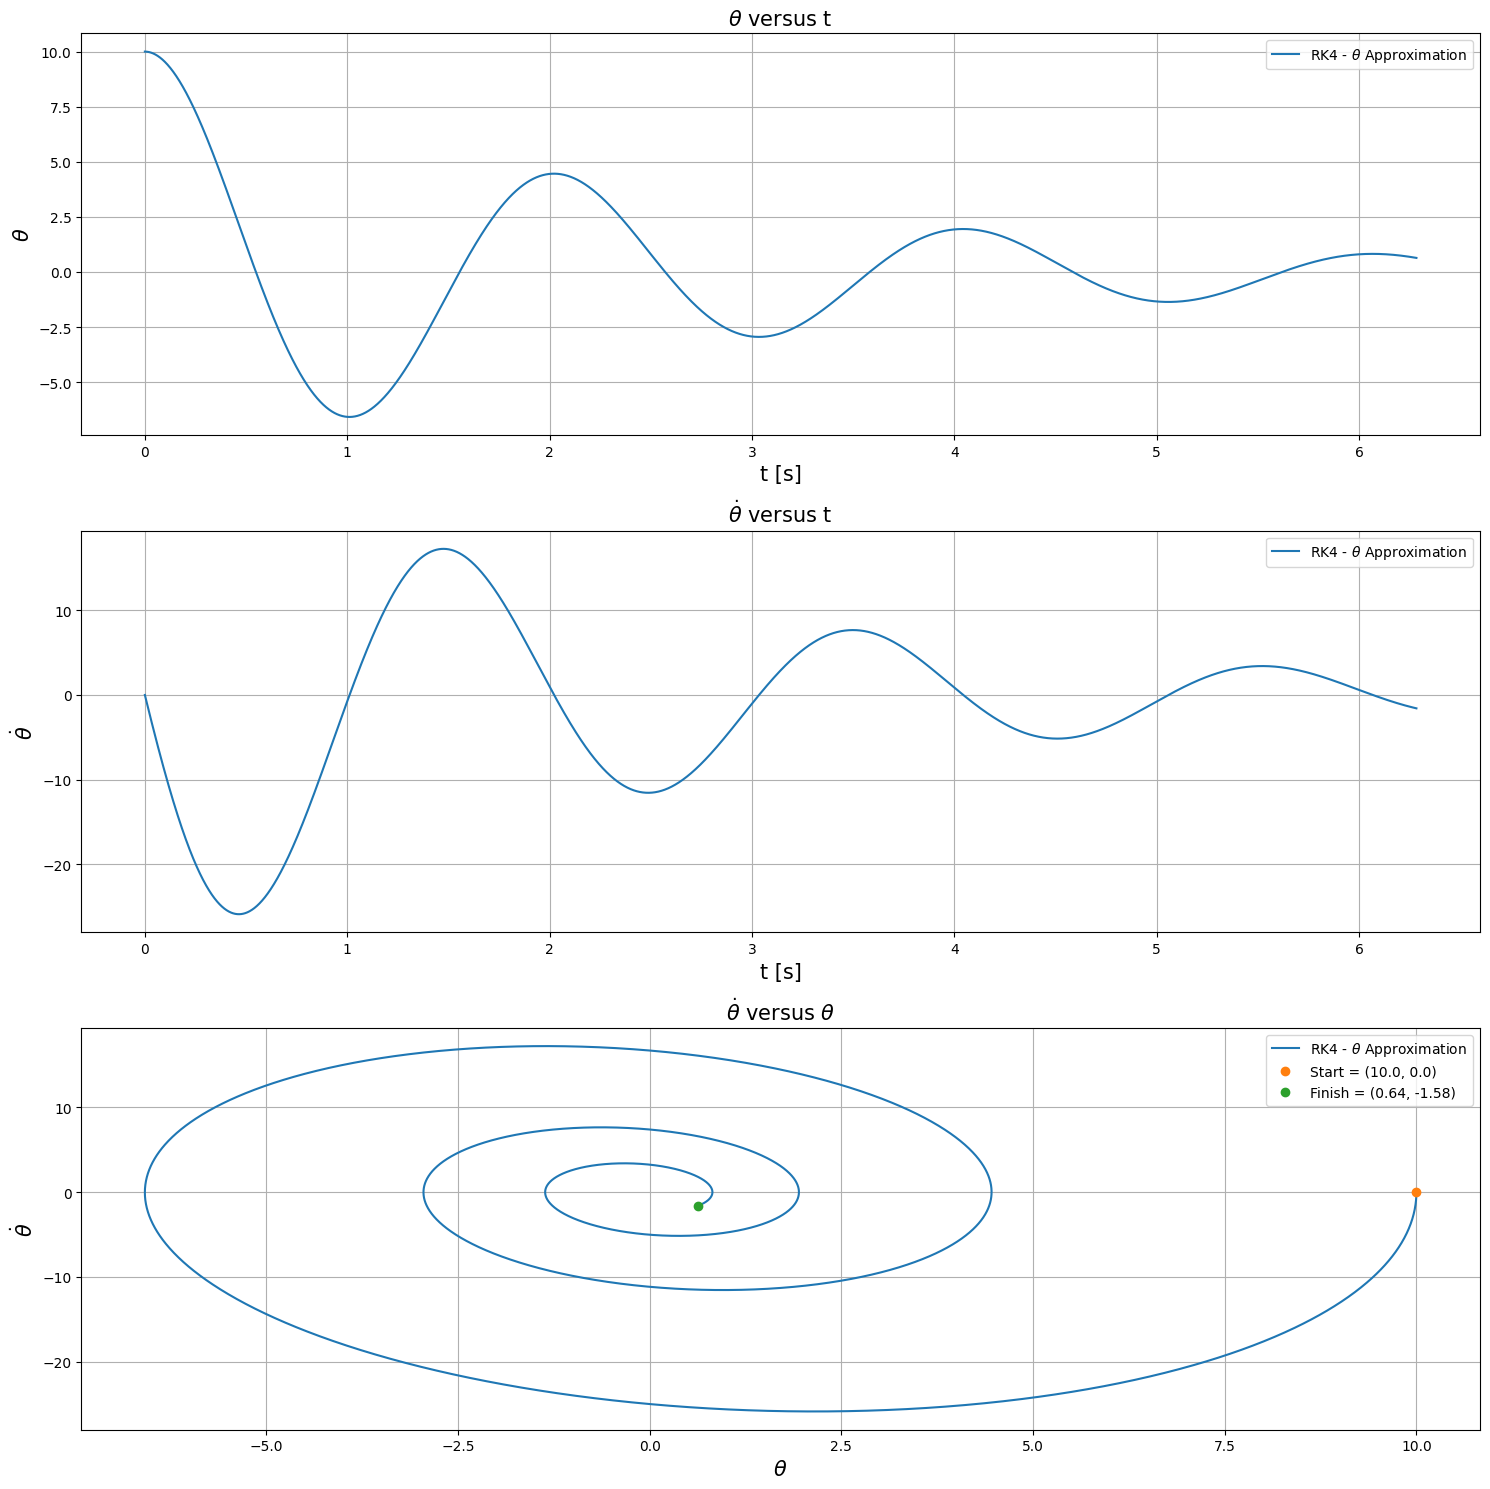

In [5]:
a1 = 0.8
f = 0.56
# For Pendulum 3
sa = True
p3 = singlePendulum(l, g, a1, f, sa)
x03 = [10.0, 0.]
# applying rk4 to the pendula objects
y0, y1 = p3.rk4(x03, t, dt)
# Applying the g2 method with the pendula objects
p3.g2(y0, y1, t)

+ __Plot One__: Shows the decrease in angle over time. The decrease in angle is caused by the damping coefficient that reduces the total energy of the system after every oscillation *__[6]__*.

+ __Plot Two__: Shows how the angular frequency is steadily decreasing. Since the energy related to the angular frequency is the kinetic energy, the motion of the pendulum begins to slow down, if the time interval is increased it would flat-line.

+ __Plot Three__: This phase plot displays the system spiraling towards an attracting point, dubbed an attractor. This implies the particle is trapped within a potential well. *__[6]__*

### Case Four

Lets observe the behavior of the same case of a damped and driven pendulum without making a small angle approximation. The equation in question is,
$$\ddot{\theta} = -\frac{g}{L}\sin\left(\theta\right) - \alpha\dot{\theta} + f\cos\left(\omega t\right).$$

As in the previous case, the damping constant is $\alpha = 0.8$ and the driving force is simply $f = 0.56$, below we define and analyze our pendulum object.

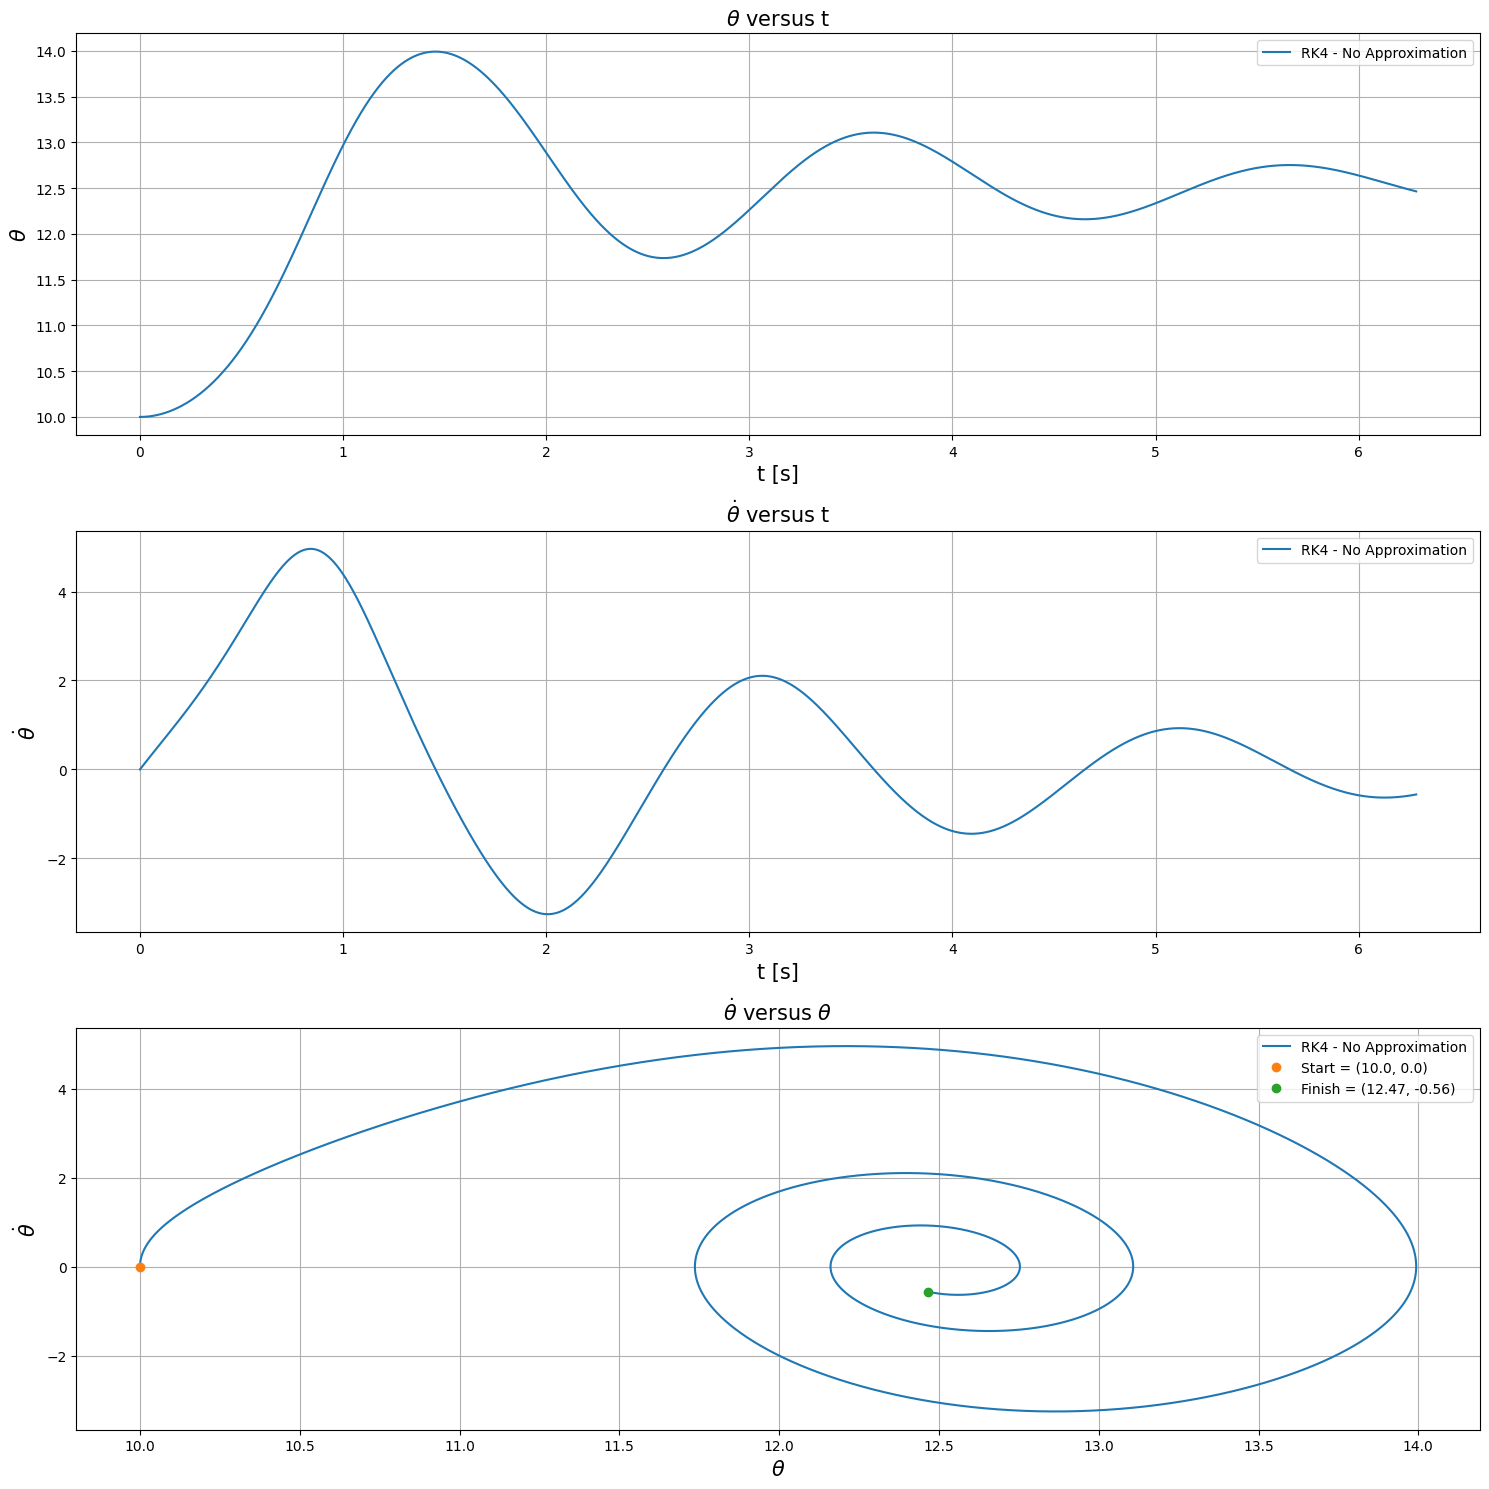

In [6]:
# For Pendulum 4
nsa = False
p4 = singlePendulum(l, g, a1, f, nsa)
x04 = [10., 0.]
y01, y11 = p4.rk4(x04, t, dt)
p4.g2(y01, y11, t)

+ __Plot One__: Theta peaks at a value around 14, then slowly decreases approaching zero as time increases. Similar to the plot for *__Case Three__*, the decrease in angle is caused by the damping coefficients.
+ __Plot Two__: $\dot{\theta}$ starts from zero, peaks and decreases over time, displaying a similar trajectory as its small angle counterpart, however, this plot is shifted by a factor of $\pi$.
+ __Plot Three__: The phase plot seems to be shifted and moves towards values of increasing theta, peaking at 14. This hinting at an increase in energy due to the driving force, leading to an increase in kinetic energy, since the angular frequency increased.

It should go without mentioning that the main difference, physically, is that the double pendulum has a second pendulum attached to the first pendulum. Although one might expect two simple harmonic oscillators, the situation is not as simple as the single pendulum.

## Introduction: Double Pendulum
Consider the double pendulum shown below:

<p align="center"><img src= "dps.png" <p>

Obtaining the Lagrangian *__[5]__*,
$$
\begin{equation}
\begin{split}
 \mathcal{L} & = \frac{1}{2}\left( m_1+m_2 \right)l_1^{2}\dot{\theta}^{2}_{1} + \frac{1}{2}m_2l_2^{2}\dot{\theta}^{2}_{2} + m_2l_1l_2\dot{\theta}_{1}\dot{\theta}_{2}\cos\left( \theta_{1}-\theta_{2} \right) \\
 & + \left( m_1+m_2 \right)gl_1\cos\left( \theta_1 \right) + m_2gl_2\cos\left(\theta_{2}\right).\\
 \end{split}
 \tag{8}
 \end{equation}
 $$

Applying the Euler-Lagrange Operator *__[6]__*, 

$$
\begin{equation}
\frac{d}{dt}\left(\frac{\partial\mathcal{L}}{\partial\theta_{i}}\right) = \frac{\partial\mathcal{L}}{\partial\theta_{i}}\text{ for i=1,2}
\end{equation}
$$
on Equation (8) yields the following set of equations:
$$
\begin{equation}
\left(m_{1}+m{2}\right)l_{1}^{2}\ddot{\theta}_{1}+m_{2}l_{1}l_{2}\ddot{\theta}_{2}\cos\left(\theta_{1}-\theta_{2}\right) =-m_{2}l_{1}l_{2}\dot{\theta}_{2}^{2}\sin\left(\theta_{1} - \theta_{2}\right)-\left(m_{1}+m_{2}\right)gl_{1}\sin\left(\theta_{1}\right)
\tag{9.1}
\end{equation}
$$

$$
\begin{equation}
m_{2}l_{1}l_{2}\ddot{\theta}_{1}\cos\left(\theta_{1}-\theta_{2}\right) + m_{2}l_{2}^{2}\ddot{\theta}_{2} = m_{2}l_{1}l_{2}\dot{\theta}_{1}^{2}\sin\left(\theta_{1}-\theta_{2}\right)-m_{2}gl_{2}\sin\left(\theta_{2}\right).
\tag{9.2}
\end{equation}
$$

Let the following substitutions take place,
$$
\begin{equation}
\begin{split}
a_{1} &= \left(m_{1}+m_{2}\right)l_{1}^{2}\\
b_{1} &= m_{2}l_{1}l_{2}\cos\left(\theta_{1}-\theta_{2}\right)\\
c_{1} &= -m_{2}l_{1}l_{2}\sin\left(\theta_{1} - \theta_{2}\right)\\
d_{1} &= -\left(m_{1}+m_{2}\right)gl_{1}\sin\left(\theta_{1}\right)\\
a_{2} &= b_{1}\\
b_{2} &= m_{2}l_{2}^{2}\\
c_{2} &= -c_{1}\\
d_{2} &= -m_{2}gl_{2}\sin\left(\theta_{2}\right)\\
\end{split}
\tag{10}
\end{equation}
$$
Making (9.1) and (9.2),

$$
\begin{equation}
a_{1}\ddot{\theta}_{1}+b_{1}\ddot{\theta}_{2} =c_{1}\dot{\theta}_{2}^{2}+d_{1}
\tag{11.1}
\end{equation}
$$
$$
\begin{equation}
b_{1}\ddot{\theta}_{1} + b_{2}\ddot{\theta}_{2} = -c_{1}\dot{\theta}_{1}^{2}+d_{2}.
\tag{11.2}
\end{equation}
$$

Setting up (11.1) and (11.2) into a system of equations,

$$
\begin{equation}
\begin{bmatrix}
a_{1} & b_{1}\\
b_{1} & b_{2}\\
\end{bmatrix}
\begin{bmatrix}
\ddot{\theta}_{1}\\
\ddot{\theta}_{2}
\end{bmatrix} 
=
\begin{bmatrix}
c_{1}\dot{\theta}_{2}^{2} & d_{1}\\
-c_{1}\dot{\theta}_{1}^{2} & d_{2}\\
\end{bmatrix}.
\tag{12}
\end{equation}
$$

Equation (12) has the following form,
$$
\begin{equation}
A\vec{x}=B.
\end{equation}
$$
Where A and B are (2x2) matrices, if the determinant of A is not zero, we can solve for $\vec{x}$ *__[2]__*. Using,
$$
\begin{equation}
\vec{x}=A^{-1}B=\frac{1}{det(A)}
\begin{bmatrix}
a_{22} & -a_{12}\\
-a_{21} & a_{11}\\
\end{bmatrix}
\begin{bmatrix}
b_{11} & b_{12}\\
b_{21} & b_{22}\\
\end{bmatrix}
\tag{13}
\end{equation}
$$
where $det(A)= a_{11}a_{22}-a_{12}a_{21}$.

Applying Equation (12) to (11) yields,

$$
\begin{equation}
\begin{bmatrix}
\ddot{\theta}_{1}\\
\ddot{\theta}_{2}
\end{bmatrix} 
=
\frac{1}{a_{1}b_{2}-b_{1}^{2}}
\begin{bmatrix}
b_{2} & -b_{1}\\
-b_{1} & a_{1}\\
\end{bmatrix}
\begin{bmatrix}
c_{1}\dot{\theta}_{2}^{2} & d_{1}\\
-c_{1}\dot{\theta}_{1}^{2} & d_{2}\\
\end{bmatrix}.
\tag{14}
\end{equation}
$$

Multiplying the matrices, gives the differential equations that describe the respective angles,

$$
\begin{equation}
\begin{bmatrix}
\ddot{\theta}_{1}\\
\ddot{\theta}_{2}
\end{bmatrix}
=
\begin{bmatrix}
\frac{b_{2}c_{1}\omega_{2}^{2} + b_{1}c_{1}\omega^{2}_{1} + b_{2}d_{1}-b_{1}d_{2}}{a_{1}b_{2}-b_{1}^{2}}\\
\frac{-b_{1}c_{1}\omega_{2}^{2} - a_{1}c_{1}\omega^{2}_{1} - b_{1}d_{1}+a_{1}d_{2}}{a_{1}b_{2}-b_{1}^{2}}\\
\end{bmatrix}
\tag{15}
\end{equation}
$$

Making use of the following substitutions, $\dot{\theta}=\omega_{i}$ and $\ddot{\theta} = \dot{\omega}_{i}$, transforms Equation (12) into,

$$
\begin{equation}
\begin{bmatrix}
\dot{\theta}_{1}\\
\dot{\theta}_{2}\\
\dot{\omega}_{1}\\
\dot{\omega}_{2}
\end{bmatrix}
=
\begin{bmatrix}
\omega_{1}\\
\omega_{2}\\
\frac{b_{2}c_{1}\omega_{2}^{2} + b_{1}c_{1}\omega^{2}_{1} + b_{2}d_{1}-b_{1}d_{2}}{a_{1}b_{2}-b_{1}^{2}}\\
\frac{-b_{1}c_{1}\omega_{2}^{2} - a_{1}c_{1}\omega^{2}_{1} - b_{1}d_{1}+a_{1}d_{2}}{a_{1}b_{2}-b_{1}^{2}}\\
\end{bmatrix}
\tag{14}
\end{equation}
$$

Now that we have the differential equations for $\theta_{1}$ and $\theta_{2}$, let's use the small angle approximations for sine and cosine,
$$
\begin{equation}
\begin{split}
\sin\left(\theta\right) &\approx \theta\\
\cos\left(\theta\right) &\approx 1 - \frac{\theta^{2}}{2} \approx 1.
\end{split}
\tag{15}
\end{equation}
$$

Applying the small angle approximations to Equation (10),
$$
\begin{equation}
\begin{split}
b'_{1} &\approx m_{2}l_{1}l_{2}\\
c'_{1} &\approx -m_{2}l_{1}l_{2}\left(\theta_{1} - \theta_{2}\right)\\
d'_{1} &\approx -\left(m_{1}+m_{2}\right)gl_{1}\left(\theta_{1}\right)\\
a'_{2} &= b_{1}\\
c'_{2} &= -c'_{1}\\
d'_{2} &\approx -m_{2}gl_{2}\left(\theta_{2}\right)\\
\end{split}
\tag{16}
\end{equation}
$$

Making the appropriate substituions in (14), gives the approximation of the differential equations,
$$
\begin{equation}
\begin{bmatrix}
\dot{\theta}_{1}\\
\dot{\theta}_{2}\\
\dot{\omega}_{1}\\
\dot{\omega}_{2}
\end{bmatrix}
\approx
\begin{bmatrix}
\omega_{1}\\
\omega_{2}\\
\frac{b_{2}c'_{1}\omega_{2}^{2} + b'_{1}c'_{1}\omega^{2}_{1} + b_{2}d'_{1}-b'_{1}d'_{2}}{a_{1}b_{2}-(b'_{1})^{2}}\\
\frac{-b'_{1}c'_{1}\omega_{2}^{2} - a_{1}c'_{1}\omega^{2}_{1} - b'_{1}d'_{1}+a_{1}d'_{2}}{a_{1}b_{2}-(b'_{1})^{2}}\\
\end{bmatrix}
\tag{17}
\end{equation}
$$

## Double Pendulum Class

The *Double Pendulum* Class was created to construct double pendulum objects. It follows a similar format to the *Single Pendulum* Class, but it doesn't include a *canned* function since it couldn't handle the definition of gamma used. Here is what the *Double Pendulum* Class contains:

+ \_\_init\_\_(self, l1, l2, m1, m2, g, a, f,small):
    + The constructor for the class.
    + The parameters correspond with what is needed to describe the system before the initial conditions are given.
    + It is nearly identical to the constructor in the *SinglePendulum* class, with the addition of the length and mass of the second pendulum.
+ de1(self,x0,x1,x2,x3, t):
    + This function simply calculates $\dot{\omega}_{1}$ shown in Equations (14) and (16).
    + With the parameter *small*, the function determines if it uses the expression in (16) or (14), the same process is used in *de2*.
    + The parameters this function uses are easily described as: $(x0, x1, x2, x3) \to (\theta_{1}, \omega_{1}, \theta_{1}, \omega_{2})$.
+ de2(self,x0,x1,x2,x3,t):
    + This function computes $\dot{\omega}_{2}$, shown in Equations (14) and (16).
    + The parameters this function uses are easily described as: $(x0, x1, x2, x3) \to (\theta_{1}, \omega_{1}, \theta_{1}, \omega_{2})$.
+ rk4(self, x, t, dt):
    + Handles  the Runge-Kutta method for differential equations. *__[5]__*.
    + The process followed for algorithm is outlined below:

      Starting from the system of equations we have,
      $$
      \begin{equation}
      \begin{split}
      \dot{\theta}_{1} &= \omega_{1}\\
      \dot{\theta}_{2} &= \omega_{2}\\
      \dot{\omega}_{1}&= F_{1}\left(\theta_{1}, \omega_{1}, \theta_{2}, \omega_{2}\right)\\
      \dot{\omega}_{2}&= F_{2}\left(\theta_{1}, \omega_{1}, \theta_{2}, \omega_{2}\right)\\
      \end{split}
      \tag{18.1}
      \end{equation}
      $$
      Where $F_1$ and $F_2$ are the functions *de$1$* and *de$2$*, respectively.
 
      Since the variables in $F_{i}$ are all implicitly dependent on time, the Runge-Kutta Method has to include $k_{ij}$ terms for all of its parameters *__[1]__*. See below,
      $$
      \begin{equation}
      \begin{split}
      k_{11} &= h\omega_{1n}\\
      k_{21} &= h\omega_{2n}\\
      k_{31} &= hF_{1}\left(\theta_{1n},\omega_{1n}, \theta_{2n},\omega_{2n}\right)\\
      k_{41} &= hF_{2}\left(\theta_{1n},\omega_{1n}, \theta_{2n},\omega_{2n}\right)\\
      k_{12} &= h\left(\omega_{1n}+\frac{k_{11}}{2}\right)\\
      k_{22} &= h\left(\omega_{2n}+\frac{k_{21}}{2}\right)\\
      k_{32} &= hF_{1}\left(\theta_{1n}+\frac{k_{11}}{2},\omega_{1n}+\frac{k_{31}}{2}, \theta_{2n}+\frac{k_{21}}{2},\omega_{2n}+\frac{k_{41}}{2}\right)\\
      k_{42} &= hF_{2}\left(\theta_{1n}+\frac{k_{11}}{2},\omega_{1n}+\frac{k_{31}}{2}, \theta_{2n}+\frac{k_{21}}{2},\omega_{2n}+\frac{k_{41}}{2}\right)\\
      k_{13} &= h\left(\omega_{1n}+\frac{k_{12}}{2}\right)\\
      k_{23} &= h\left(\omega_{2n}+\frac{k_{22}}{2}\right)\\
      k_{33} &= hF_{1}\left(\theta_{1n}+\frac{k_{12}}{2},\omega_{1n}+\frac{k_{32}}{2}, \theta_{2n}+\frac{k_{22}}{2},\omega_{2n}+\frac{k_{42}}{2}\right)\\
      k_{43} &= hF_{2}\left(\theta_{1n}+\frac{k_{12}}{2},\omega_{1n}+\frac{k_{32}}{2}, \theta_{2n}+\frac{k_{22}}{2},\omega_{2n}+\frac{k_{42}}{2}\right)\\
      k_{14} &= h\left(\omega_{1n}+k_{13}\right)\\
      k_{24} &= h\left(\omega_{2n}+k_{23}\right)\\
      k_{34} &= hF_{1}\left(\theta_{1n}+k_{13},\omega_{1n}+k_{33}, \theta_{2n}+k_{23},\omega_{2n}+k_{43}\right)\\
      k_{44} &= hF_{2}\left(\theta_{1n}+k_{13},\omega_{1n}+k_{33}, \theta_{2n}+k_{23},\omega_{2n}+k_{43}\right)\\
      \end{split}
      \tag{18.2}
      \end{equation}
      $$
      Once these coefficients are calculated, angular velocites and angles are calculated,
      $$
      \begin{equation}
      \begin{split}
      \theta_{1n} &= \theta_{1n-1} + \frac{1}{6}\left(k_{11}+2k_{12}+2k_{13}+k_{14}\right) + \mathcal{O}\left(h^{5}\right)\\
      \theta_{2n} &= \theta_{2n-1} + \frac{1}{6}\left(k_{21}+2k_{22}+2k_{23}+k_{24}\right) + \mathcal{O}\left(h^{5}\right)\\
      \omega_{1n} &= \omega_{1n-1} + \frac{1}{6}\left(k_{31}+2k_{32}+2k_{33}+k_{34}\right) + \mathcal{O}\left(h^{5}\right)\\
      \omega_{2n} &= \omega_{2n-1} + \frac{1}{6}\left(k_{41}+2k_{42}+2k_{43}+k_{44}\right) + \mathcal{O}\left(h^{5}\right)\\
      \end{split}
      \tag{18.3}
      \end{equation}
      $$

+ plotting(self,x0, y0, y1, y2, y3, t):
  + Handles the plotting for the different angles and their angular velocities.
  + The parameters it takes:
    + Initial conditions
    + The computed value for the first angle
    + The first angular frequency
    + The second angle
    + The second angular frequency
    + The time range.
  + Treats the plot as a matrix with two rows and three columns
    + The rows correspond to the different angles
    + The columns are for: angle v. t, angular frequency v. t, and the phase plot

+ ep(self):
  + The purpose of this function is to compute both the eigen values and eigen vectors.
  + The parameter is simply the object and the attributes that come with it.

__Notes__:
+ *To produce over the top motion, provide kinetic energy. Omega has to have a non-zero IV*.
+ The Euler Method produces a good approximation for the calculation of the angles.
+ When the masses were set to $m_{1} = 100.0\,kg$ and $m_{2} = 10.0\,kg$ there would be an overflow error.
+ Masses can't both be 10 kg, it seems to work only with masses equal to 10; otherwise I get an overflow error.
+ Also won't run if the length of the strings is greater than 0.5, overflow error.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, matrix
from numpy.linalg import eig

class doublePendulum(object):
    """
    Let x = [x[0], x[1], x[2], x[3]]
    where x[0] is the initial angle corresponding to theta one, x[1] is the angular frequency of theta one, etc.
    The system we will be defining is:
    y[0] = x[1]
    y[1] = first element of the system of equations
    y[2] = x[3]
    y[3] = second element of the system of equations    
    (1). __init__: Initializes the coefficients used in the equations
    (2). de1: A function that represents the differential equation of the first angle, just to contain the func.
    (3). de2: A function that represents the differential equations for the second angle, just to contain the func.
    (4). rk4: Function that solves the system of differential equations.
    (5). plotting: Takes care of the plotting for the class, showing the angle's plot over time, the angular frequency over time
                    as well as its phase plot.
"""
    def __init__(self, l1, l2, m1, m2, g, a, f,small):
        self.l1 = l1
        self.l2 = l2
        self.m1 = m1
        self.m2 = m2
        self.g = g
        self.a = a
        self.f = f
        self.small = small
    #first differential equation, just to contain it
    def de1(self,x0,x1,x2,x3, t):
        #x0 is theta1
        #x1 is omega1
        #x2 is theta2
        #x3 is omega2
        l1 = self.l1
        l2 = self.l2
        m1 = self.m1
        m2 = self.m2
        g = self.g
        a = self.a
        f = self.f
        small = self.small
        w = 0.8
        if small == False:
            a1 = (m1+m2)*l1*l1
            b1 = m2*l1*l2*np.cos(x0 - x2)
            c1 = -m2*l1*l2*np.sin(x0-x2)
            d1 = -(m1+m2)*g*l1*np.sin(x0)
            a2 = b1
            b2 = m2*l2*l2
            c2 = -c1
            d2 = -m2*g*l2*np.sin(x2)
            term = 1./(a1*b2-b1*b1)
            de1 = term*(b2*c1*x3*x3 + b1*c1*x1 + b2*d1 - b1*d2)
        else:
            a1 = (m1+m2)*l1*l1
            b1 = m2*l1*l2
            c1 = -m2*l1*l2*(x0-x2)
            d1 = -(m1+m2)*g*l1*(x0)
            a2 = b1
            b2 = m2*l2*l2
            c2 = -c1
            d2 = -m2*g*l2*(x2)
            term = 1./(a1*b2-b1*b1)
            de1 = term*(b2*c1*x3*x3 + b1*c1*x1 + b2*d1 - b1*d2)
        return de1 - a*x1 + f*np.cos(w*t)

            
    # second differential equation, just to contain it
    def de2(self,x0,x1,x2,x3,t):
        #x0 is theta1
        #x1 is omega1
        #x2 is theta2
        #x3 is omega2
        l1 = self.l1
        l2 = self.l2
        m1 = self.m1
        m2 = self.m2
        g = self.g
        a = self.a
        f = self.f
        small = self.small
        w = 0.8
        fac = self.de1(x0,x1,x2,x3,t)
        if small == False:
            a1 = (m1+m2)*l1*l1
            b1 = m2*l1*l2*np.cos(x0 - x2)
            c1 = -m2*l1*l2*np.sin(x0-x2)
            d1 = -(m1+m2)*g*l1*np.sin(x0)
            a2 = b1
            b2 = m2*l2*l2
            c2 = -c1
            d2 = -m2*g*l2*np.sin(x2)
            term = 1./(a1*b2-b1*b1)
            de2 = -b1*c1*x3*x3 - a1*c1*x1*x1 - b1*d1 + a1*d2
        else:
            a1 = (m1+m2)*l1*l1
            b1 = m2*l1*l2
            c1 = -m2*l1*l2*(x0-x2)
            d1 = -(m1+m2)*g*l1*(x0)
            a2 = b1
            b2 = m2*l2*l2
            c2 = -c1
            d2 = -m2*g*l2*(x2)
            term = 1./(a1*b2-b1*b1)
            de2 = -b1*c1*x3*x3 - a1*c1*x1*x1 - b1*d1 + a1*d2
        return de2-a*x3 + fac
    def rk4(self, x, t, dt):
        N = len(t)
        h = dt
        # 0_1
        x0 = np.zeros(N)
        x0[0] = x[0]
        # w_1
        x1 = np.zeros(N)
        x1[0] = x[1]
        # 0_2
        x2 = np.zeros(N)
        x2[0] = x[2]
        # w_2
        x3 = np.zeros(N)
        x3[0] = x[3]
        '''
        x0 corresponds to theta one
        x1 corresponds to omega one
        x2 corresponds to theta two
        x3 corresponds to omega two
        '''
        for i in range(1,N):
            # First set of RK Coefficients
            k11 = h*self.de1(x0[i-1], x1[i-1], x2[i-1], x3[i-1], t[i-1])
            k21 = h*(self.de2(x0[i-1], x1[i-1], x2[i-1], x3[i-1], t[i-1]))
            k31 = h*(x1[i-1])
            k41 = h*(x3[i-1])
            # Second set of RK Coefficients
            k12 = h*self.de1(x0[i-1]+k31/2., x1[i-1]+k11/2., x2[i-1]+k41/2., x3[i-1]+k21/2., t[i-1])
            k22 = h*self.de2(x0[i-1]+k31/2., x1[i-1]+k11/2., x2[i-1]+k41/2., x3[i-1]+k21/2., t[i-1])
            k32 = h*(x1[i-1]+k31/2.)
            k42 = h*(x3[i-1]+k41/2.)
            # Third set of RK Coefficients
            k13 = h*self.de1(x0[i-1]+k32/2., x1[i-1]+k12/2., x2[i-1]+k42/2., x3[i-1]+k22/2., t[i-1])
            k23 = h*self.de2(x0[i-1]+k32/2., x1[i-1]+k12/2., x2[i-1]+k42/2., x3[i-1]+k22/2., t[i-1])
            k33 = h*(x1[i-1]+k32/2.)
            k43 = h*(x3[i-1]+k42/2.)
            # Fourth set of RK Coefficients
            k14 = h*self.de1(x0[i-1]+k33, x1[i-1]+k13, x2[i-1]+k43, x3[i-1]+k23, t[i-1])
            k24 = h*self.de2(x0[i-1]+k33, x1[i-1]+k13, x2[i-1]+k43, x3[i-1]+k23, t[i-1])
            k34 = h*(x1[i-1]+k33)
            k44 = h*(x3[i-1]+k43)
            # Calculations for the respective variables;
            # Omega1, Omega2, Theta1, Theta2
            x1[i] = x1[i-1] + (k11 + 2.*k12 + 2.*k13 + k14)/6.0
            x3[i] = x3[i-1] + (k21 + 2.*k22 + 2.*k23 + k24)/6.0
            x0[i] = x0[i-1] + (k31 + 2.*k32 + 2.*k33 + k34)/6.0
            x2[i] = x2[i-1] + (k41 + 2.*k42 + 2.*k43 + k44)/6.0
        return x0,x1,x2,x3
    
    def plotting(self,x0, y0, y1, y2, y3, t):
        N = len(t)-1
        if self.small == True:
            des = "$\\theta$ Approximation"
        else:
            des = "No $\\theta$ Approximation"
        fig,z = plt.subplots(2,3, figsize = (15,15))
        # For the first angle
        z[0][0].plot(t,y0, label = "RK4 - {}".format(des))
        z[0][0].set_title("$\\theta_{1}$ versus t", size = 15)
        z[0][0].set_xlabel("t [s]", size = 15)
        z[0][0].set_ylabel("$\\theta$", size = 15)
        z[0][0].legend(loc = "best")
        z[0][0].grid()
        z[0][1].plot(t,y1, label = "RK4 - {}".format(des))
        z[0][1].set_title("$\dot{\\theta}_{1}$ versus t", size = 15)
        z[0][1].set_xlabel("t [s]", size = 15)
        z[0][1].set_ylabel("$\dot{\\theta}$", size = 15)
        z[0][1].legend(loc = "best")
        z[0][1].grid()
        z[0][2].plot(y0,y1, label = "RK4 - {}".format(des))
        z[0][2].plot(y0[0],y1[0], 'o', label = "Start: ({},{})".format("%.2f"%y0[0],"%.2f"%y1[0]))
        z[0][2].plot(y0[N],y1[N], 'o', label = "Finish: ({},{})".format("%.2f"%y0[N],"%.2f"%y1[N]))
        z[0][2].set_title("$\dot{\\theta}_{1}$ versus $\\theta_{1}$", size =15)
        z[0][2].set_xlabel("$\\theta$", size = 15)
        z[0][2].set_ylabel("$\dot{\\theta}$", size = 15)
        z[0][2].legend(loc = "best")
        z[0][2].grid()
        # For the second angle
        z[1][0].plot(t,y2, label = "RK4 - {}".format(des))
        z[1][0].set_title("$\\theta_{2}$ versus t", size = 15)
        z[1][0].set_xlabel("t [s]", size = 15)
        z[1][0].set_ylabel("$\\theta$", size = 15)
        z[1][0].legend(loc = "best")
        z[1][0].grid()
        z[1][1].plot(t,y3, label = "RK4 - {}".format(des))
        z[1][1].set_title("$\dot{\\theta}_{2}$ versus t", size = 15)
        z[1][1].set_xlabel("t [s]", size = 15)
        z[1][1].set_ylabel("$\dot{\\theta}$", size = 15)
        z[1][1].legend(loc = "best")
        z[1][1].grid()
        z[1][2].plot(y2,y3, label = "RK4 - {}".format(des))
        z[1][2].plot(y2[0],y3[0], 'o', label = "Start: ({},{})".format("%.2f"%y2[0],"%.2f"%y3[0]))
        z[1][2].plot(y2[N],y3[N], 'o', label = "Finish: ({},{})".format("%.2f"%y2[N],"%.2f"%y3[N]))
        z[1][2].set_title("$\dot{\\theta}_{2}$ versus $\\theta_{2}$", size =15)
        z[1][2].set_xlabel("$\\theta$", size = 15)
        z[1][2].set_ylabel("$\dot{\\theta}$", size = 15)
        z[1][2].legend(loc = "lower left")
        z[1][2].grid()
        fig.tight_layout()
        plt.show()

    def ep(self):
        l1 = self.l1
        l2 = self.l2
        m1 = self.m1
        m2 = self.m2
        g = self.g
        w = np.zeros(2)
        a1 = (m1+m2)*l1*l1
        b1 = m2*l1*l2
        e1 = 2.*b1*b1
        e2 = b1*a1 + (l2*b1*b1)/l1 + (g*b1*b1)/l1 + (a1*b1*g)/l1
        e3 = (l2*a1*b1)/l1 + (a1*b1*g)/l1 + (a1*b1*g*g)/(l1*l1) - b1*b1
        x1 = (-e2 + np.sqrt(e2*e2 - 4.*e1*e3))/(2.*e1) 
        x2 = (-e2 - np.sqrt(e2*e2 - 4.*e1*e3))/(2.*e1)
        w1 = x1
        w2 = x2
        A1 = np.array([[a1 + b1*w1 + (a1/l1)*g, (b1+ b1*w1)],
              [(b1-b1*w1), ((l2*b1)/l1) + b1*w1+ (b1/l1)*g]])
        A2 = np.array([[a1 + b1*w2 + (a1/l1)*g, (b1+ b1*w2)],
              [(b1-b1*w2), ((l2*b1)/l1) + b1*w2+ (b1/l1)*g]])
        u1,v1 = np.linalg.eig(A1)
        u2, v2 = np.linalg.eig(A2)
        return np.sqrt(w1*-1), np.sqrt(w2*-1)

    def plotting2(self, t, y00, y01, y10, y11):
        fig,z = plt.subplots(1,2,figsize = (10, 5))
        z[0].plot(t, y00, label = "$\\theta_{1}(t)$")
        z[0].plot(t, y01, label = "$\\theta_{2}(t)$")
        z[0].set_title("Approximate $\\theta_{i}$ versus t", size = 15)
        z[0].set_xlabel("t [s]", size = 15)
        z[0].set_ylabel("$\\theta$", size = 15)
        z[0].legend(loc = "best")
        z[0].grid()
        z[1].plot(t, y10, label = "$\\theta_{1}(t)$")
        z[1].plot(t, y11, label = "$\\theta_{2}(t)$")
        z[1].set_title("$\\theta_{i}$ versus t", size = 15)
        z[1].set_xlabel("t [s]", size = 15)
        z[1].set_ylabel("$\\theta$", size = 15)
        z[1].legend(loc = "best")
        z[1].grid()
        fig.tight_layout()
        plt.show()

ImportError: cannot import name 'matrix' from 'scipy' (/opt/homebrew/lib/python3.11/site-packages/scipy/__init__.py)

## Applying the Double Pendulum Class

For this particular class the casses we will explore are the following:
1. First case:
   + Small angle approximation, no damping or driving force; $\alpha = 0$ and $f=0$
   + No damping or driving force; $\alpha = 0$ and $f=0$
2. Second case:
   + Small angle approximation, damping, $\alpha = 0.5$ and driving force $f = 0.5$
   + Damping, $\alpha = 0.5$ and driving force $f = 0.5$

### First Case

#### Small Angle Approximation

The first part in case one, will be using the small angle approximation with the following parameters:

$$
\begin{equation}
\begin{split}
l_{1} &= l_{2} = 1/2\\
m_{1} &= 10\\
m_{2} &= 1\\
g &= 9.81
\end{split}
\tag{19.1}
\end{equation}
$$
The initial conditions used within the first case will be,
$$
\begin{equation}
\vec{x} = \left(0, 0, \frac{\pi}{4}, 0\right)^{T}.
\tag{19.2}
\end{equation}
$$

Using these conditions, we construct our Double Pendulum Object and solve the differential equations.

In [ ]:
l1, l2, m1, m2, g, a, f,small0 = 0.5, 0.5, 10.,1.,9.81,0.,0.,True
p1 = doublePendulum(l1, l2, m1, m2, g, a, f,small0)
conv = (np.pi/180.)
init0 = [0., 0., 45.*conv, 0.]
dt = 0.001
T = 2.*np.pi
t = np.arange(0.0, 2*T, dt)
y00,y01,y02,y03 = p1.rk4(init0, t, dt)

In [ ]:
p1.plotting(init0, y00, y01, y02, y03, t)

__Row One__: Displays the behavior of the first pendulum.
+ The first two plots show that the amplitude of the angle and the angular frequency increase over time, and repeats every 12 seconds or so. The final plot displays interesting behavior since it seems that as the phase plot will strike zero again, it loops and starts up again.
+ Comparing with row two, column three; it seems that as the second pendulum begins transfering its kinetic energy to potential, the first pendulum begins a new cycle turning its potential energy to kinetic energy. 

__Row Two__: Displays of the behavior of the second pendulum.
+ Again the first two plots display sinusoidal behavior, except that in this case, the increase in amplitude is much more subtle than in the first row. The phase plot seems to expand outward, and then slowly come back to the center past its initial point.
+ Based on this behavior if the program ran for a while longer, the green point, would strike (0,0).

#### No Approximation

The conditions showed in Equations (18.1) and (18.2) will remain the same, the only thing that will change for this new object is the parameter *small*. This parameter will be set to *False*, in order to account for us not taking the small angle approximation.

In [ ]:
l1, l2, m1, m2, g, a, f,small2 = 0.5, 0.5, 10.,1.,9.81,0.,0.,False
p2 = doublePendulum(l1, l2, m1, m2, g, a, f,small2)
y10,y11,y12,y13 = p2.rk4(init0, t, dt)

In [ ]:
p2.plotting(init0, y10, y11, y12, y13, t)

__Row One__: Behavior of the first angle.

+ Relative to the first set of plots where the angle approximation is taken, the first thing to note is that the amplitudes peak, and then decrease and this seems to be periodic.
+ The peak of the angle is about half of that shown in the approximate case.
+ The peak of the angular frequency appears to oscillate within [0,1.5] periodically, after about 7-seconds. When compared to the approximate case, this seems to be half the time it takes for this oscillation to take place.
+ The phase plot, is very similar but the amount of loops that have happened in clearly less than in the first cycle, and can be attributed to the oscillation of both the angular frequency and angle. This hints at a much faster transfer of energy between potential and kinetic.

__Row Two__: Behavior of the second angle.

+ The first two plots show a very consistent oscillation pattern until it reaches about 7 seconds, similar to the first angle. Also showing that the time it takes for a cycle is about half, when compared to its approximate counter-part.
+ The phase plot shows cycles that the green point has expanded outward, then come back into its original orbit without being on the same path.

In both cases, the angular frequency is started at 0, so there will be no over the top motion. This is also apparent in the shape of the phase plots for both the approximate and non-approximate case, an elliptical orbit.

### Second Case

#### Small Angle Approximation

In this case, let the initial conditions and other parameter be the same. The changes will be in the damping coefficient and the driving force, they will take on the values listed in the case description above.

In [ ]:
l1, l2, m1, m2, g, a, f,small = 0.5, 0.5, 10.,1.,9.81,0.5,0.5,True
p3 = doublePendulum(l1, l2, m1, m2, g, a, f,small)
y20, y21,y22, y23 = p3.rk4(init0, t, dt)

In [ ]:
p3.plotting(init0, y20, y21,y22, y23, t)

#### No Approximation

As before, the change will be in the *small* parameter, it will be set to *False*.

In [ ]:
l1, l2, m1, m2, g, a, f,small = 0.5, 0.5, 10.,1.,9.81,0.5,0.5,False
p4 = doublePendulum(l1, l2, m1, m2, g, a, f,small)
y30, y31,y32, y33 = p4.rk4(init0, t, dt)

In [ ]:
p4.plotting(init0, y30, y31,y32, y33, t)

__Comparison of Plots__:
+ The small angle and non-approximation plots look very similar. The most noticeable differences is the amplitude of the angle and the angular frequency. The non-approximate case has a slightly lower amplitude, and in som cases it is half of the approximate case.
+ The phase plots are also nearly identical, but they end at different points and they only differ slightly.

Since the approximation is very similar to the non-approximate case, I will be using the approximation to turn the system of equations into an eigen-value problem and find the normal frequency of the system.__*[3]*__

## Double Pendulum: Normal Modes 

Applying Equation (15) to (9.1) and (9.2),

$$
\begin{equation}
\begin{split}
\left(m_{1}+m_{2}\right)l_{1}^{2}\ddot{\theta}_{1}+m_{2}l_{1}l_{2}\ddot{\theta}_{2} &\approx \left[-m_{2}l_{1}l_{2}\dot{\theta}_{2}^{2}\left(\theta_{1} - \theta_{2}\right)-\left(m_{1}+m_{2}\right)gl_{1}\left(\theta_{1}\right)\right]\\
m_{2}l_{1}l_{2}\ddot{\theta}_{1} + m_{2}l_{2}^{2}\ddot{\theta}_{2} &\approx m_{2}l_{1}l_{2}\dot{\theta}_{1}^{2}\left(\theta_{1}-\theta_{2}\right)-m_{2}gl_{2}\left(\theta_{2}\right)\\
\end{split}
\end{equation}
$$

Noting that the angular velocities for both pendulums must be the same, and rearanging,

$$
\begin{equation}
\left(m_{1}+m_{1}\right)l_{1}^{2}\ddot{\theta}_{1}+m_{2}l_{1}l_{2}\ddot{\theta}_{2} \approx \left[-m_{2}l_{1}l_{2}\omega^{2}-\left(m_{1}+m_{2}\right)gl_{1}\right]\theta_{1}-m_{2}l_{1}l_{2}\omega^{2}\theta_{2}
\tag{20.1}
\end{equation}
$$

$$
\begin{equation}
m_{2}l_{1}l_{2}\ddot{\theta}_{1} + m_{2}l_{2}^{2}\ddot{\theta}_{2} \approx m_{2}l_{1}l_{2}\omega^{2}\theta_{1}+\left[-m_{2}l_{1}l_{2}\omega^{2}-m_{2}gl_{2}\right]\theta_{2}
\tag{20.2}
\end{equation}
$$

Setting the two equations above as an eigen-value problem yields,
$$
\begin{equation}
\begin{bmatrix}
\left(m_{1}+m_{2}\right)l_{1}^{2} & m_{2}l_{1}l_{2}\\
m_{2}l_{1}l_{2} & m_{2}l_{2}^{2}\\
\end{bmatrix}
\begin{bmatrix}
\ddot{\theta}_{1}\\
\ddot{\theta}_{2}\\
\end{bmatrix}
\approx
\begin{bmatrix}
\left[-m_{2}l_{1}l_{2}\omega^{2}-\left(m_{1}+m_{2}\right)gl_{1}\right] & -m_{2}l_{1}l_{2}\omega^{2}\\
m_{2}l_{1}l_{2}\omega^{2} & \left[-m_{2}l_{1}l_{2}\omega^{2}-m_{2}gl_{2}\right]
\end{bmatrix}
\begin{bmatrix}
\theta_{1}\\
\theta_{2}\\
\end{bmatrix}
\tag{21}
\end{equation}
$$

Solving Equation (21) for the frequencies, yielded an equations of the form,

$$
\begin{equation}
e_{1}\omega^{4} + e_{2}\omega^{2} + e_{3} = 0
\end{equation}
$$
where $e_{1}, e_{2}, e_{3}$ are all constants. This equation is solved using the quadratic equation by simply solving for $\omega^{2}$, once this value was obtained, the eiegen-vectors were found *__[3]__*. Based on Equation (21), the eigen-values don't depend on anything other than the constraints within the system; mass, and string length. There has to be a combination that will produce some sort of stable behavior.

The idea is to use the eigen values obtained from the approximate case to see if there is some sort of stable behavior when those values are used within the non-approximate case. To compare the two situations, first I will construct two different double pendulum objects, set their boolean parameter, *small*, to *True* for the first and *False* for the second object. Then call the *ep()* instance, to obtain the eigen values, and finally set these values as the initial conditions *__[3]__*.

The following coefficients will be used:
+ $l_{1} = 0.5$
+ $l_{2} = \frac{l_{1}}{5}$
+ $m_{1} = 10$
+ $m_{2} = \frac{m_{1}}{10}$
+ When there is damping and driving force, the values will simply be 0.5.

In [ ]:
# Double pendulum using the small angle approximation with damping and driving force
l1, l2, m1, m2, g, a, f,small6 = 0.5, 0.1, 10.,1.,9.81,0.5,0.5,True
p6 = doublePendulum(l1, l2, m1, m2, g, a, f,small6)

u1, u2 = p6.ep()
init0 = [15*conv, u1*conv, 15*conv, u2*conv]

# Double pendulum with damping and driving force
l1, l2, m1, m2, g, a, f,small7 = 0.5, 0.1, 10.,1.,9.81,0.5,0.5,False
p7 = doublePendulum(l1, l2, m1, m2, g, a, f,small7)
init1 = [175*conv, u1*conv, 175*conv, u2*conv]

y60, y61, y62, y63 = p6.rk4(init0, t, dt)
y70, y71, y72, y73 = p7.rk4(init1, t, dt)

In [ ]:
p6.plotting2(t, y60, y62, y70, y72)

In the case in which the small angle approximation is made, the inital angles for the pendula is $\frac{\pi}{6}$, but for the non-approximate case the initial angles are $\frac{\pi}{2}$. The initial value of their angular frequencies are the eigen values we calculated.

+ __Left Figure__:
  + The angles behave as if they were a single pendulum going in opposite directions.
  + The plot shows behavior corresponding to a single damped pendulum, meaning both pendulums behave as if the other was not there.
+ __Right Figure__:
  + This figure corresponds to the case where the small angle approximation is not used.
  + The figure shows the second angle, orange, extending past both positive pi before slowly declining due to damping.

As a sanity check, I will be plotting the same objects without damping or driving force, to see if they truly resemble a normal mode.

In [ ]:
# Double pendulum using the small angle approximation without damping or driving force
l1, l2, m1, m2, g, a, f,small8 = 0.5, 0.1, 10.,1.,9.81,0.,0.,True
p8 = doublePendulum(l1, l2, m1, m2, g, a, f,small8)
u1, u2 = p8.ep()
# Double pendulum without damping or driving force
l1, l2, m1, m2, g, a, f,small9 = 0.5, 0.1, 10.,1.,9.81,0.,0.,False
p9 = doublePendulum(l1, l2, m1, m2, g, a, f,small9)

y80, y81, y82, y83 = p8.rk4(init0, t, dt)
y90, y91, y92, y93 = p9.rk4(init1, t, dt)

In [ ]:
p8.plotting2(t, y80, y82, y90, y92)

As expected the small angle approximation plot (left) yields a normal mode plot when there is no damping or driving force. However, the non-approximate plot doesn't give a constant sinusoidal behavior for either angle after 5 seconds.

## Conclusion

Within this case study we analyzed the single pendulum's behavior under small angle approximation and without approximating the angle. Further exploration of the pendulum with damping and driving force was done, in order to observe the behavior displayed under these circumstances. Once this case study was concluded we approached the double pendulum, using the same approach; introduce new parameters once one behavior was analyzed to observe the changes.

While analyzing the changes between the approximate and non-approximate cases, I decided to obtain the eigenvalues of the approximate system and observe how they changed the behavior of the non-approximate case. Upon doing so, the behavior of both the approximate and non-approximate theta's resembled that of the damped single pendulum with a driving force. This implied that there was some stable behavior using the eigen values as the initial conditions. As a way of checking if this would yield a normal mode in the absence of a driving force and damping I decided to plot the un-damped and un-driven double pendulum. Under these conditions the approximate case yielded a normal mode, while the non-approximate gave somewhat of a normal mode.

From here I would go back and refine the methods used within the eigen-value calculator and develop an algorithm that would find the values for the constants that will give the normal mode for either case.

<div align="center"> <font size="+2">References

[1] ```Runge-kutta 4 with multiple equations and no time dependence.```

[2] ```Sheldon Axler. Linear Algebra Done Right. Springer, 2015.```

[3] ```Frank Harris George B. Arkfen, Hans J. Weber. Mathematical Methods for Physicist, Fifth Edition. Academic Press, 2000.```

[4] ```MIT. “myphysicslab double pendulum”, 2002.```

[5] ```Manuel J. Paez Rubin H Landau and Cristian C. Bordeianu. “Computational Physics: Problem Solving with Python”. WILEY-VCH, 2005.```

[6] ```Jerry B. Marion Stephen T. Thornton. “Classical Dynamics of Particles and Systems”.Brooks/Cole, 2004.```